In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier


In [50]:
#loading the dataset
df = pd.read_csv("C:/Users/eyeco/Downloads/Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [52]:
df.shape

(7043, 21)

In [53]:
df.isna().sum()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [54]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


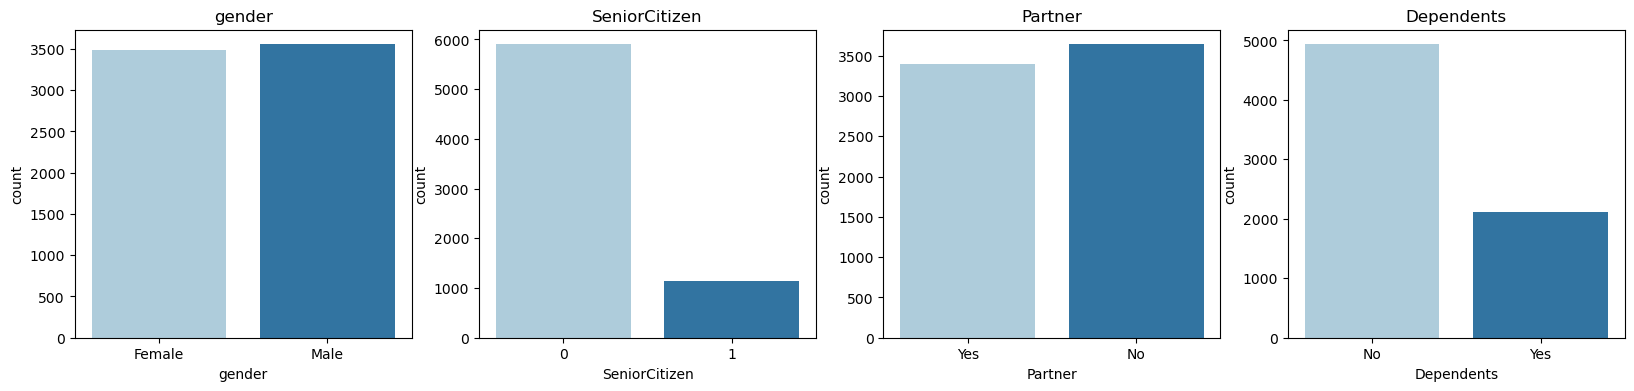

In [55]:
#some exploratory analyses
cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

plt.figure(figsize=(20, 4))

for i, col in enumerate(cols):
    plt.subplot(1, len(cols), i+1)
    sns.countplot(x=col, data=df, palette=sns.color_palette("Paired"))
    plt.title(col)


<AxesSubplot:xlabel='Churn', ylabel='MonthlyCharges'>

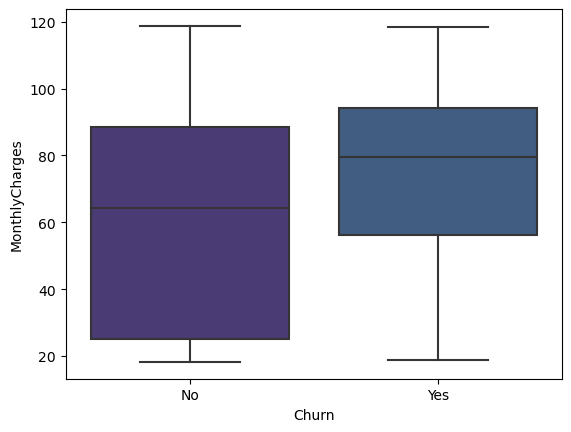

In [56]:
sns.set_palette("viridis")
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)

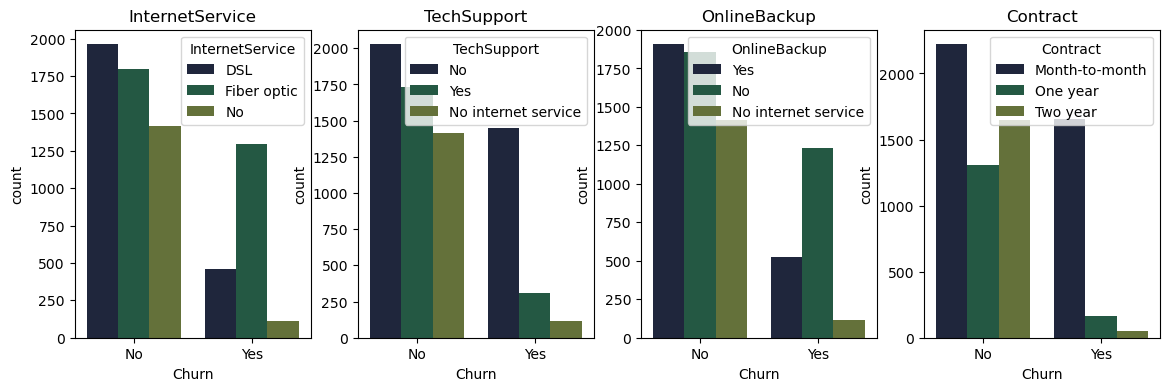

In [57]:
sns.set_palette("cubehelix")
cols = ['InternetService', 'TechSupport', 'OnlineBackup', 'Contract']

plt.figure(figsize=(14, 4))

for i, col in enumerate(cols):
    plt.subplot(1, len(cols), i+1)
    sns.countplot(x='Churn', hue=str(col), data=df)
    plt.title(col)

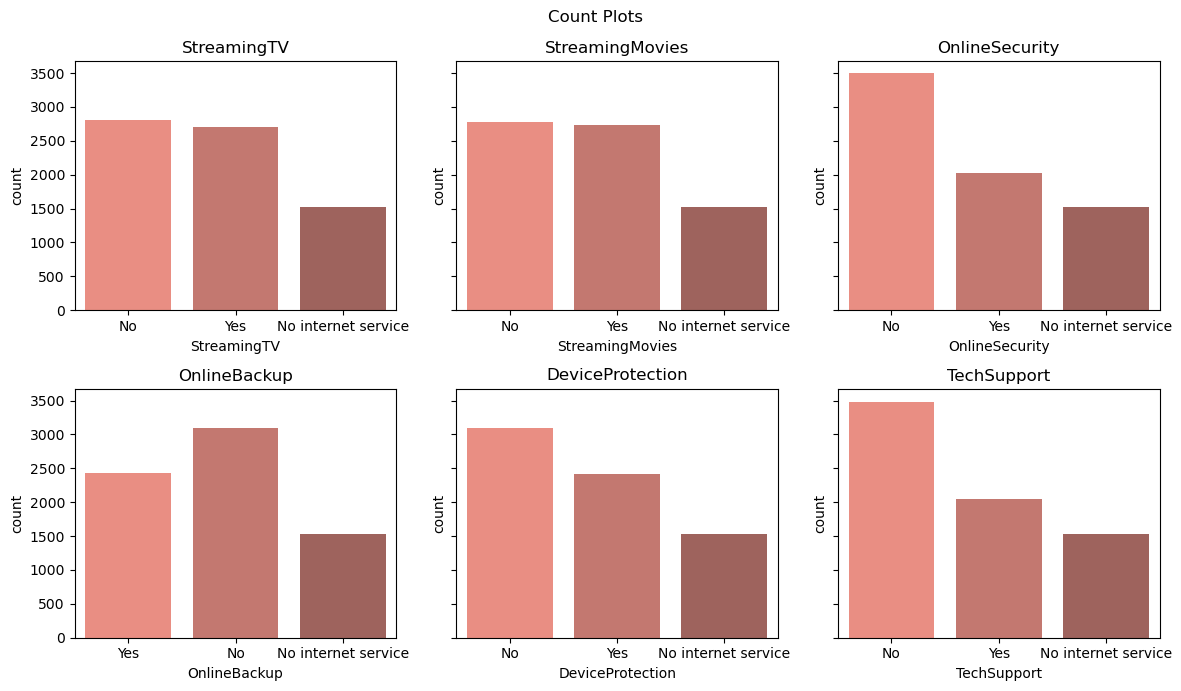

In [58]:
sns.set_palette("dark:salmon_r")
columns = ["StreamingTV", "StreamingMovies", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport"]

# Create a figure and an array of axes
fig, axes = plt.subplots(2, 3, figsize=(12, 7), sharey=True)

# Flatten the axes array to make it easier to iterate through
axes = axes.flatten()

for i, column in enumerate(columns):
    # Create a count plot for the current column
    sns.countplot(x=column, data=df, ax=axes[i])

    # Set title for the current subplot
    axes[i].set_title(column)

# Set a title for the entire figure (optional)
fig.suptitle("Count Plots")

# Adjust layout to prevent overlapping titles
plt.tight_layout()

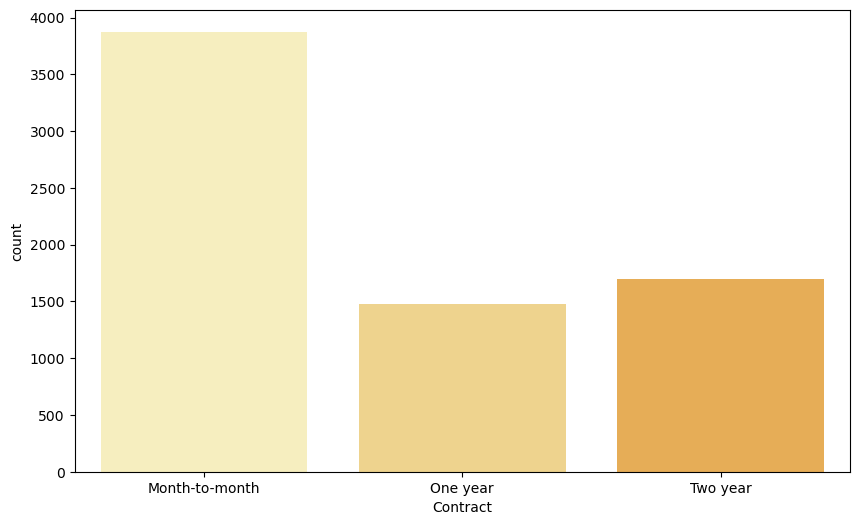

In [59]:
with sns.color_palette("YlOrBr"):
    plt.figure(figsize=(10,6))
    sns.countplot(x="Contract", data=df)


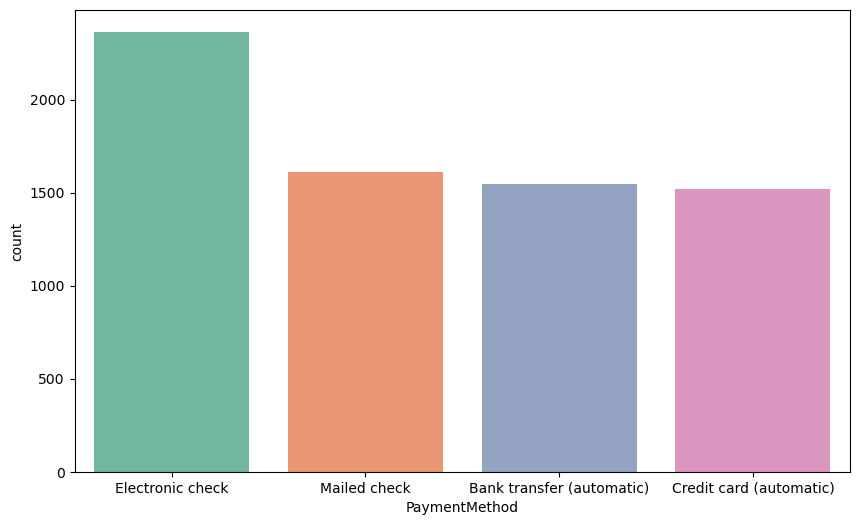

In [60]:
with sns.color_palette("Set2"):
    plt.figure(figsize=(10,6))
    sns.countplot(x="PaymentMethod", data=df)


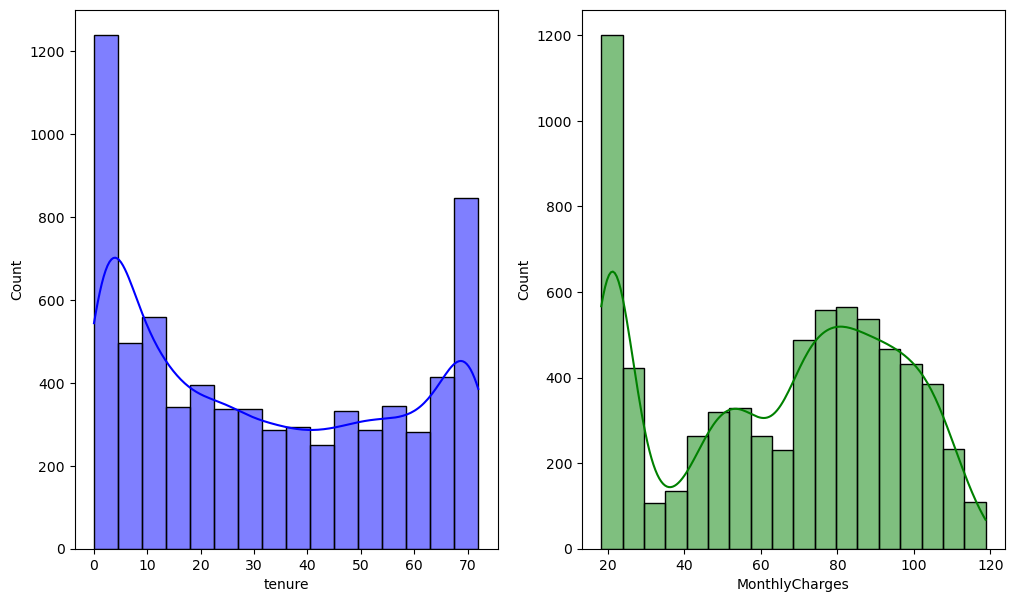

In [61]:
with sns.color_palette("husl"):
    fig, axes = plt.subplots(1,2, figsize=(12, 7))
    sns.histplot(df["tenure"], ax=axes[0], kde=True, color='blue')  
    sns.histplot(df["MonthlyCharges"], ax=axes[1], kde=True, color='green')  


In [62]:
churnnum = {'Yes':1, 'No':0}
df.Churn.replace(churnnum, inplace=True)
churnnum


{'Yes': 1, 'No': 0}

In [63]:
genderval = pd.pivot_table(df, values='Churn', index=['gender'],
                    columns=['SeniorCitizen'], aggfunc=np.mean)
genderval


SeniorCitizen,0,1
gender,,
Female,0.239384,0.422535
Male,0.232808,0.411150


In [64]:
df.drop(['customerID','gender','PhoneService','Contract','TotalCharges'], axis=1, inplace=True)
df.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'Churn'],
      dtype='object')

In [65]:
# Resampling
nox = df[df.Churn == 0]
noy = df[df.Churn == 1]

yesupsampled = noy.sample(n=len(nox), replace=True, random_state=42)
print(len(yesupsampled))


5174


In [66]:
# Create an instance of MinMaxScaler
minmax = MinMaxScaler()

# Apply Min-Max scaling to 'tenure' and 'MonthlyCharges' columns
df[['tenure', 'MonthlyCharges']] = minmax.fit_transform(df[['tenure', 'MonthlyCharges']])

# Print the shape of the DataFrame
print(df.shape)

(7043, 16)


In [67]:
df.head()

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,Yes,No,0.013889,No phone service,DSL,No,Yes,No,No,No,No,Yes,Electronic check,0.115423,0
1,0,No,No,0.472222,No,DSL,Yes,No,Yes,No,No,No,No,Mailed check,0.385075,0
2,0,No,No,0.027778,No,DSL,Yes,Yes,No,No,No,No,Yes,Mailed check,0.354229,1
3,0,No,No,0.625000,No phone service,DSL,Yes,No,Yes,Yes,No,No,No,Bank transfer (automatic),0.239303,0
4,0,No,No,0.027778,No,Fiber optic,No,No,No,No,No,No,Yes,Electronic check,0.521891,1


In [68]:
cat_features = df.drop(['MonthlyCharges','SeniorCitizen','tenure'],axis=1)

cat_features.head()

,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Churn
0,Yes,No,No phone service,DSL,No,Yes,No,No,No,No,Yes,Electronic check,0
1,No,No,No,DSL,Yes,No,Yes,No,No,No,No,Mailed check,0
2,No,No,No,DSL,Yes,Yes,No,No,No,No,Yes,Mailed check,1
3,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,No,Bank transfer (automatic),0
4,No,No,No,Fiber optic,No,No,No,No,No,No,Yes,Electronic check,1


In [69]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
df_cat = cat_features.apply(le.fit_transform)
df_cat.head()

,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Churn
0,1,0,1,0,0,2,0,0,0,0,1,2,0
1,0,0,0,0,2,0,2,0,0,0,0,3,0
2,0,0,0,0,2,2,0,0,0,0,1,3,1
3,0,0,1,0,2,0,2,2,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,1,2,1


In [70]:
num_features = df[['MonthlyCharges','SeniorCitizen','tenure']]
finaldf = pd.merge(num_features, df_cat, left_index=True, right_index=True)

In [71]:
from sklearn.model_selection import train_test_split

finaldf = finaldf.dropna()


X = finaldf.drop(['Churn'],axis=1)
y = finaldf['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [72]:
pip install imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


In [73]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE(k_neighbors=5)
X_smote, y_smote = oversample.fit_resample(X_train, y_train)
X_train, y_train = X_smote, y_smote

In [74]:
y_train.value_counts()

0    3477
1    3477
Name: Churn, dtype: int64

**Precision** focuses on the accuracy of positive predictions, answering the question: "Of all the instances predicted as positive, how many were actually positive?"

**F1 Score** balances precision and recall, providing a single metric that considers both false positives and false negatives. It's particularly useful when the classes are imbalanced.


Train accuracy SVM:  0.819672131147541
Test accuracy SVM:  0.7410752688172043
Recall Score:  0.7292993630573248
Precision Score:  0.5146067415730337
F1 Score:  0.603425559947299


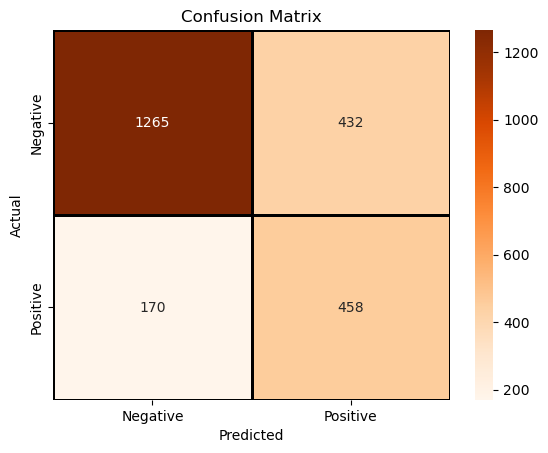

In [75]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

C_value = 3

# Creating an SVM classifier with balanced class weights
svmclf = SVC(C=C_value, class_weight='balanced', random_state=43)

# Fitting the SVM classifier on the training data
svmclf.fit(X_train, y_train)

# Predictions on training set
y_pred_tr_svm = svmclf.predict(X_train)

# Printing training accuracy
train_accuracy_svm = accuracy_score(y_train, y_pred_tr_svm)
print('Train accuracy SVM: ', train_accuracy_svm)

# Predictions on test set
y_pred_test_svm = svmclf.predict(X_test)

# Printing testing accuracy
test_accuracy_svm = accuracy_score(y_test, y_pred_test_svm)
print('Test accuracy SVM: ', test_accuracy_svm)

# Printing recall score
recall_svm = recall_score(y_test, y_pred_test_svm)
print("Recall Score: ", recall_svm)

# Printing precision score
precision_svm = precision_score(y_test, y_pred_test_svm)
print("Precision Score: ", precision_svm)

# Printing F1 score
f1_svm = f1_score(y_test, y_pred_test_svm)
print("F1 Score: ", f1_svm)

# Building confusion matrix
matrix_svm = confusion_matrix(y_test, y_pred_test_svm)

# Plotting confusion matrix heatmap 
ax_svm = plt.subplot()
sns.heatmap(matrix_svm, annot=True, fmt='d', linewidths=2, linecolor='black', cmap='Oranges', ax=ax_svm)
ax_svm.set_xlabel('Predicted')
ax_svm.set_ylabel('Actual')
ax_svm.set_ylim(2.0, 0)
ax_svm.set_title('Confusion Matrix')
ax_svm.xaxis.set_ticklabels(['Negative', 'Positive'])
ax_svm.yaxis.set_ticklabels(['Negative', 'Positive'])
plt.show()


Train accuracy for XGB:  0.7979580097785447
Test accuracy for XGB:  0.7544086021505376
Recall Score for XGB:  0.7722929936305732
Precision Score for XGB:  0.5312157721796276
F1 Score XGB:  0.6294613887086307


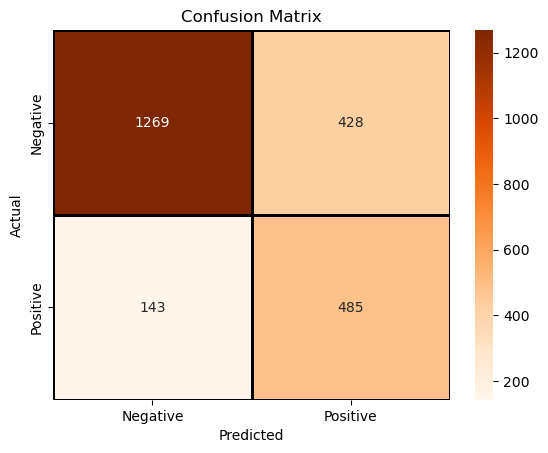

In [76]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


best_parameters = {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'colsample_bytree': 0.8}

# Creating an XGBoost classifier
clf_xgb = XGBClassifier(
    learning_rate=best_parameters['learning_rate'],
    max_depth=best_parameters['max_depth'],
    n_estimators=best_parameters['n_estimators'],
    colsample_bytree=best_parameters['colsample_bytree'],
    eval_metric='mlogloss',
    scale_pos_weight=scale  # Make sure to define 'scale' appropriately
)

# Fitting the XGBoost classifier on the training data
clf_xgb.fit(X_train, y_train)

# Predictions on training set
y_pred_tr_xgb = clf_xgb.predict(X_train)

# Printing training accuracy
train_accuracy_xgb = accuracy_score(y_train, y_pred_tr_xgb)
print('Train accuracy for XGB: ', train_accuracy_xgb)

# Predictions on test set
y_pred_test_xgb = clf_xgb.predict(X_test)

# Printing testing accuracy
test_accuracy_xgb = accuracy_score(y_test, y_pred_test_xgb)
print('Test accuracy for XGB: ', test_accuracy_xgb)

# Printing recall score
recall_xgb = recall_score(y_test, y_pred_test_xgb)
print("Recall Score for XGB: ", recall_xgb)

# Printing precision score
precision_xgb = precision_score(y_test, y_pred_test_xgb)
print("Precision Score for XGB: ", precision_xgb)

# Printing F1 score
f1_xgb = f1_score(y_test, y_pred_test_xgb)
print("F1 Score XGB: ", f1_xgb)

# Building confusion matrix
matrix_xgb = confusion_matrix(y_test, y_pred_test_xgb)

# Plotting confusion matrix heatmap
ax_xgb = plt.subplot()
sns.heatmap(matrix_xgb, annot=True, fmt='d', linewidths=2, linecolor='black', cmap='Oranges', ax=ax_xgb)
ax_xgb.set_xlabel('Predicted')
ax_xgb.set_ylabel('Actual')
ax_xgb.set_ylim(2.0, 0)
ax_xgb.set_title('Confusion Matrix')
ax_xgb.xaxis.set_ticklabels(['Negative', 'Positive'])
ax_xgb.yaxis.set_ticklabels(['Negative', 'Positive'])
plt.show()
